# Examples of plotannot annotations

This notebooks presents a few examples of the _plotannot_ package for annotating axis labels.

## Getting ready

In [1]:
#Load a few packages for plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(1) #make notebook reproducible

In [2]:
#Load plotannot
import plotannot

In [3]:
#Create some fake data
table = pd.DataFrame(np.random.random((100,50)))
table.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.417022,0.720324,0.000114,0.302333,0.146756,0.092339,0.186260,0.345561,0.396767,0.538817,...,0.988861,0.748166,0.280444,0.789279,0.103226,0.447894,0.908596,0.293614,0.287775,0.130029
1,0.019367,0.678836,0.211628,0.265547,0.491573,0.053363,0.574118,0.146729,0.589306,0.699758,...,0.114746,0.949489,0.449912,0.578390,0.408137,0.237027,0.903380,0.573679,0.002870,0.617145
2,0.326645,0.527058,0.885942,0.357270,0.908535,0.623360,0.015821,0.929437,0.690897,0.997323,...,0.556240,0.136455,0.059918,0.121343,0.044552,0.107494,0.225709,0.712989,0.559717,0.012556
3,0.071974,0.967276,0.568100,0.203293,0.252326,0.743826,0.195429,0.581359,0.970020,0.846829,...,0.263297,0.065961,0.735066,0.772178,0.907816,0.931972,0.013952,0.234362,0.616778,0.949016
4,0.950176,0.556653,0.915606,0.641566,0.390008,0.485991,0.604310,0.549548,0.926181,0.918733,...,0.315245,0.892889,0.577857,0.184010,0.787929,0.612031,0.053909,0.420194,0.679069,0.918602


In [4]:
#Prepare some english words to use for labels
import english_words
words = sorted(list(english_words.english_words_lower_set))
rand_integers = np.random.randint(0, len(words), size=100)
words = [words[i] for i in rand_integers] #100 random words

## Simple example

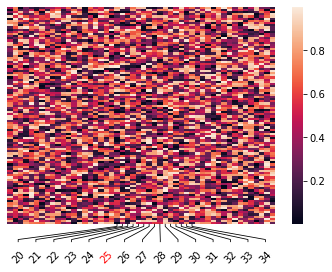

In [5]:
#Plot heatmap
ax = sns.heatmap(table, xticklabels=True, yticklabels=False)

#Rotate all labels
plotannot.format_ticklabels(ax, axis="xaxis", rotation=45)

#Annotate labels
to_label = range(20,35)
plotannot.annotate_ticks(ax, axis="xaxis", labels=to_label) 

#Color individual labels
plotannot.format_ticklabels(ax, axis="xaxis", labels=[25], color="red")

plt.savefig("simple_example.png", bbox_inches="tight", facecolor='white')

## Annotate axis of scatter plots

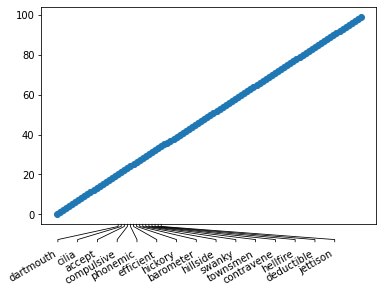

In [6]:
fig, ax = plt.subplots()
ax.scatter(words, range(len(words)))

#First rotate to make labels fit
plotannot.format_ticklabels(ax, axis="xaxis", rotation=90) 

#Annotate labels
to_label = [words[i] for i in range(20,35)]
plotannot.annotate_ticks(ax, axis="xaxis", labels=to_label, rel_label_size=2) #rel_label_size gives a bit better space for the labels

#Finally, rotate labels to be more visible
plotannot.format_ticklabels(ax, axis="xaxis", rotation=30, ha="right")

## Annotate x- and/or y-axis ticks

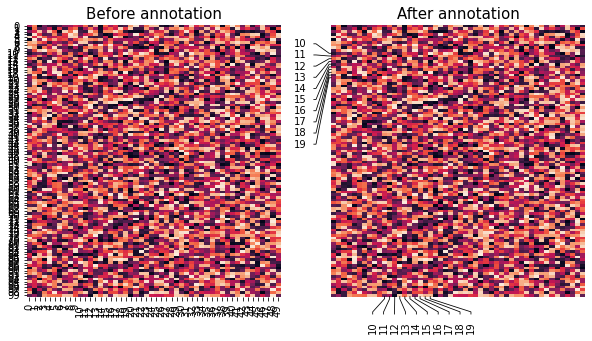

In [7]:
#Plot data with labels
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
sns.heatmap(table, yticklabels=True, xticklabels=True, cbar=False, ax=ax1)
sns.heatmap(table, yticklabels=True, xticklabels=True, cbar=False, ax=ax2)

#Apply annotation to second axes
to_label = range(10,20)
plotannot.annotate_ticks(ax2, axis="xaxis", labels=to_label)
plotannot.annotate_ticks(ax2, axis="yaxis", labels=to_label)

#Label axes
_ = ax1.set_title("Before annotation", size=15)
_ = ax2.set_title("After annotation", size=15)

plt.savefig("before_after.png", bbox_inches="tight", facecolor='white')

The function _annotate_ticks_ also works directly on seaborn objects such as the ClusterGrid of _sns.clustermap_:

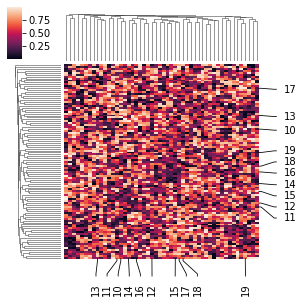

In [8]:
g = sns.clustermap(table, yticklabels=True, xticklabels=True, figsize=(4,4))

to_label = range(10,20)
plotannot.annotate_ticks(g, axis="xaxis", labels=to_label)
plotannot.annotate_ticks(g, axis="yaxis", labels=to_label)

## Choose specific labels for bottom/top and left/right axes

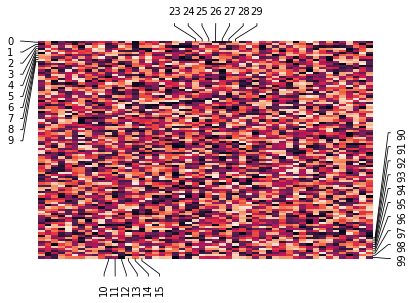

In [9]:
#Plot data and turn on all labels on
ax = sns.heatmap(table, yticklabels=True, xticklabels=True, cbar=False) 
ax.tick_params(right=True, top=True, left=True, bottom=True,
               labelleft=True, labelbottom=True, labelright=True, labeltop=True)

#Apply annotation for each axis
left_labels = range(10)
plotannot.annotate_ticks(ax, axis="left", labels=left_labels)

right_labels = range(90,100)
plotannot.annotate_ticks(ax, axis="right", labels=right_labels)

bottom_labels = range(10,16)
plotannot.annotate_ticks(ax, axis="bottom", labels=bottom_labels)

top_labels = range(23,30)
plotannot.annotate_ticks(ax, axis="top", labels=top_labels)

## Highlight specific rows with color, size and annotation

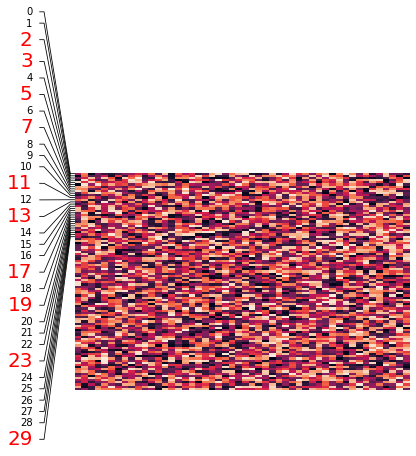

In [10]:
ax = sns.heatmap(table, xticklabels=False, yticklabels=True, cbar=False)

#Color a subset of labels
to_format = [2,3,5,7,11,13,17,19,23,29]
plotannot.format_ticklabels(ax, "yaxis", labels=to_format, color="red", fontsize=20)

#Annotate all ticks
plotannot.annotate_ticks(ax, "yaxis", labels=range(0,30), expand_axis=1, perp_shift=10)

## Highlight and rotate labels

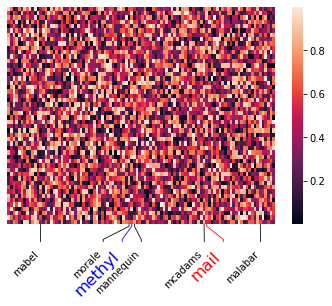

In [11]:
#Plot data
word_table = pd.DataFrame(np.random.random((50,100)), columns=words)
ax = sns.heatmap(word_table, yticklabels=False, xticklabels=True)

#Label specific words
plotannot.format_ticklabels(ax, "xaxis", labels=["mail"], color="red", format_ticks=True, fontsize=16)
plotannot.format_ticklabels(ax, "xaxis", labels=["methyl"], color="blue", format_ticks=True, fontsize=16)

#Annotate ticks starting with "m"
m_words = [word for word in words if word.startswith("m")]
plotannot.annotate_ticks(ax, "xaxis", labels=m_words, rel_label_size=1.5)

#Rotate all ticklabels to 45 degrees
plotannot.format_ticklabels(ax, "xaxis", rotation=45, ha="right")